<img src="https://miro.medium.com/max/1400/1*4jEJ6qNFsxf8ic_hcdsJ7Q.jpeg">

# Project: Investigate a Dataset -TMDb (The movie database)


## Table of Contents
<ul>
<li><a href="#Intro">Introduction</a></li>
<li><a href="#Wrangling">Data Wrangling</a></li>
<li><a href="#EDA">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>

<a id='Intro'></a>

## Introduction


   In this project, we shall be doing a correlational data analysis of the Movies dataset ,TMDb which was gotten from **data-set-options** [data-set-options.](https://s3.amazonaws.com/video.udacity-data.com/topher/2018/July/5b57919a_data-set-options/data-set-options.pdf) , The first among the options. Download [here](https://www.google.com/url?q=https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv&sa=D&ust=1532469042115000)
   
*Our varables of interest are Viewer's Rating , Movie's Polularity ,Budget and Revenue . we shall be studying the given Dataset to try answer some questions and popluar assumptions as regards some key factors affecting the revenue generation for movies produced over the years. Our case study shall be the movies database(TMDb) , record captured from 1960 to 2015
.After investigating this dataset, we hope to answer the following research questions*
   


  
  
   **Question 1:** What is the relationship between ratings and revenues?
   
   **Question 2:** Hows does budget affects revenue?
  
   **Question 3:** Relationship between polularity of a movie and revenue
  
  
  
  

    
    
    
  

  


<a id='Wrangling'></a>
## Data Wrangling
*In this section , we shall be inspecting the dataset and possibly cleaning it , to ensure its suitablity for analysis*

In [146]:
#Importing packages needed

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [147]:
#loading tmdb csv dataset

movies=pd.read_csv('tmdb-movies.csv')

In [148]:
#viewing first 5 observations
movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [149]:
#Getting the dimention of the dataframe
movies.shape

(10866, 21)

 This dataset has a total of **10866** rows and **21** columns

In [150]:
#Getting the summary infomation of the dataset
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

## Data Cleaning


***We need to drop columns that are not relevant to our research questions .

In [151]:
movies.drop(['id','imdb_id','homepage','tagline','overview','runtime','production_companies','director','release_date','genres','cast','keywords'], axis = 1, inplace = True)
movies.head()

,popularity,budget,revenue,original_title,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,2947,7.3,2015,1.747999e+08,1.385749e+09


In [152]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10866 non-null  float64
 1   budget          10866 non-null  int64  
 2   revenue         10866 non-null  int64  
 3   original_title  10866 non-null  object 
 4   vote_count      10866 non-null  int64  
 5   vote_average    10866 non-null  float64
 6   release_year    10866 non-null  int64  
 7   budget_adj      10866 non-null  float64
 8   revenue_adj     10866 non-null  float64
dtypes: float64(4), int64(4), object(1)
memory usage: 764.1+ KB


**Lets check for duplicates

In [153]:
#Checking for dupliicates
movies.duplicated().sum()

1

In [154]:
#Droping the duplicates
movies.drop_duplicates(inplace=True)

In [155]:
#checking to be sure dubplicates are removed 
movies.duplicated().sum()

0

**Next , we address the issue of missing or unknown values/Obervations

In [156]:
movies.isnull().sum()

popularity        0
budget            0
revenue           0
original_title    0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

There are no missing values from the columns of interest.we proceed


In [158]:
movies.shape

(10865, 9)

In [159]:
movies.describe()

,popularity,budget,revenue,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04
mean,0.646446,1.462429e+07,3.982690e+07,217.399632,5.975012,2001.321859,1.754989e+07,5.136900e+07
std,1.000231,3.091428e+07,1.170083e+08,575.644627,0.935138,12.813260,3.430753e+07,1.446383e+08
min,0.000065,0.000000e+00,0.000000e+00,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.207575,0.000000e+00,0.000000e+00,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.383831,0.000000e+00,0.000000e+00,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.713857,1.500000e+07,2.400000e+07,146.000000,6.600000,2011.000000,2.085325e+07,3.370173e+07
max,32.985763,4.250000e+08,2.781506e+09,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


<a id='EDA'></a>
## Exploratory Data Analysis

We have successfully cleaned the dataset and its now ready for analsysis , in answering our research questions 


### Research Question 1 :What is the relationship between ratings and revenues


,id,popularity,budget,revenue,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,1.000000,-0.014351,-0.141341,-0.099235,-0.035555,-0.058391,0.511393,-0.189008,-0.138487
popularity,-0.014351,1.000000,0.545481,0.663360,0.800828,0.209517,0.089806,0.513555,0.609085
budget,-0.141341,0.545481,1.000000,0.734928,0.632719,0.081067,0.115904,0.968963,0.622531
revenue,-0.099235,0.663360,0.734928,1.000000,0.791174,0.172541,0.057070,0.706446,0.919109
vote_count,-0.035555,0.800828,0.632719,0.791174,1.000000,0.253818,0.107962,0.587062,0.707941
vote_average,-0.058391,0.209517,0.081067,0.172541,0.253818,1.000000,-0.117576,0.093079,0.193062
release_year,0.511393,0.089806,0.115904,0.057070,0.107962,-0.117576,1.000000,0.016771,-0.066236
budget_adj,-0.189008,0.513555,0.968963,0.706446,0.587062,0.093079,0.016771,1.000000,0.646627
revenue_adj,-0.138487,0.609085,0.622531,0.919109,0.707941,0.193062,-0.066236,0.646627,1.000000


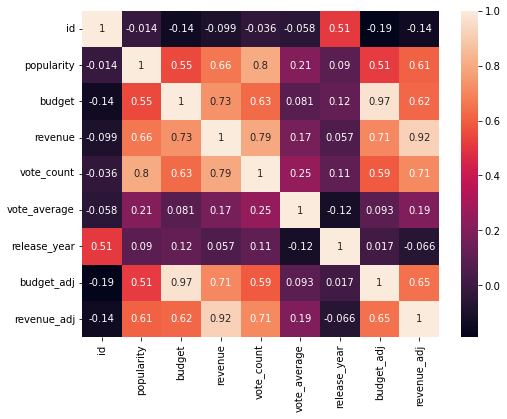

In [112]:
#Generating a correlation matrix to show relationships among different variables

fig, ax = plt.subplots(figsize=(8, 6))

sns.heatmap(movies.corr(), ax=ax, annot=True)

movies.corr()

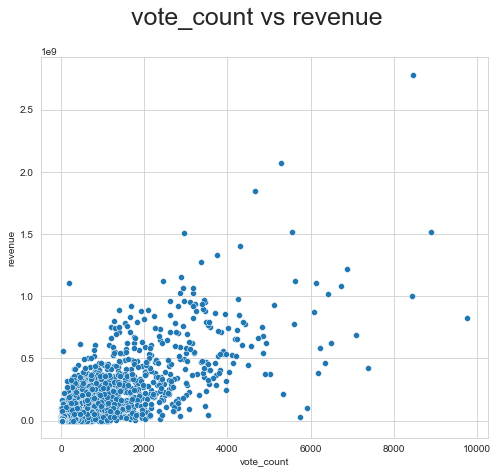

In [161]:
#Plotting a scatter plot for  Vote_counte Vs Revenue
fig, axes = plt.subplots(1,1,figsize = (8,7))
fig.suptitle("vote_count vs revenue",fontsize=25)
sns.scatterplot(data=movies,x="vote_count" ,y="revenue");

In [162]:
#Computing the correlaion between Vote_counnts and revenue of movies
rate_rev=movies['vote_count'].corr(movies['revenue'])  
rate_rev

0.7911743699314724

From the above information , we can see a fairly strong posiive correlation of **0.79** between viewers' rating (vote_counts) and revenue  This means vote_counts contribute about 79% to the revenue generated 

### Research Question 2 :Hows does budget affects revenue

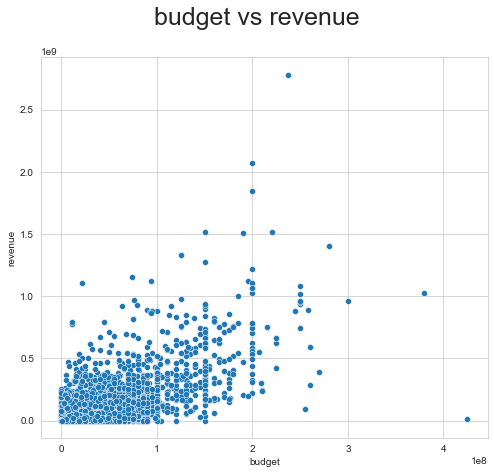

In [142]:
#Plotting a scatter plot of budget vs revenue
fig, axes = plt.subplots(1,1,figsize = (8,7))
fig.suptitle("budget vs revenue",fontsize=25)
sns.scatterplot(data=movies,x="budget" ,y="revenue",sizes=(200, 200), legend="full");


In [115]:
#Compputing the correlation between revenue and Budget
rev_bud=movies['revenue'].corr(movies['budget'])  
rev_bud

0.7349279812889292

we can see that there is fairly strong posiive correlation of **0.73** between viewers' rating (vote_counts) and revenue 

i.e to say the amonut of money bugeted for a movie contributes about 73% of revenue realized

### Research Question 3 :Relationship between Polularity and revenue



In [94]:
#Computing the correlaion between poplularity and revenue of movies
pop_rev=movies['popularity'].corr(movies['revenue'])  
pop_rev

0.6633602814125898

**This tells us that the popularity of movies captured in TMDb accounts for about 66% of the revenue realized

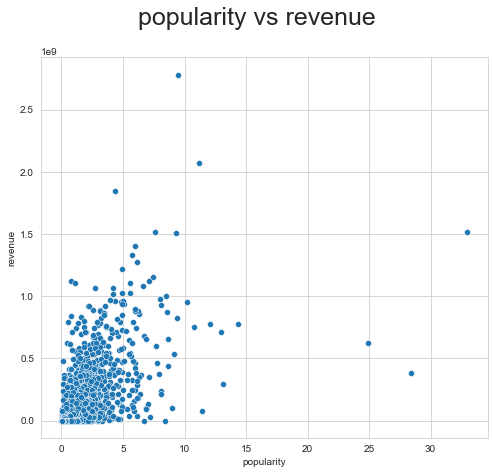

In [163]:
#Plotting a scatter plot of popularity vs revenue
fig, axes = plt.subplots(1,1,figsize = (8,7))
fig.suptitle("popularity vs revenue",fontsize=25)
sns.scatterplot(data=movies,x="popularity" ,y="revenue" ,sizes=(200, 200), legend="full");

*There is a fair correlation between Movie's popularity and revenue generated*


<a id='conclusions'></a>
## Conclusions

> 
- Veiwer's rating contribute 79%.
- Budget contributes 73%. 
- Popularity contributes 66%.


>**Limitations** 
- Over the past 55 years (1960-2015), from TDMb,we can see that veiwers' rating (vote_count)  tops the charts in contributing greatly to the revennue generated for movies compared to budget and popularity of a movie